
## Game of Life

Code examples from Think Complexity, 2nd edition.

Copyright 2016 Allen Downey, https://opensource.org/licenses/MIT  

The code is obtained from this link. https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap06.ipynb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import savefig

from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

In [2]:
#The following function creates a Life object and 
#sets the initial condition using strings of 0 and 1 characters.

def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

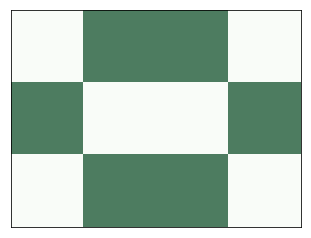

In [3]:
# beehive or still life pattern

life = make_life(3, 4, 0, 0, '0110', '1001', '0110')
life.draw()
#savefig('beehive')

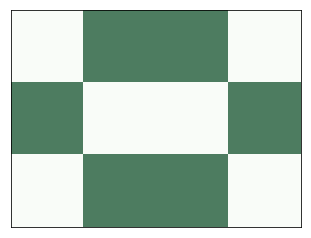

In [4]:
# here is the beehive after one step
life.step()
life.draw()

Saving figure to file toad


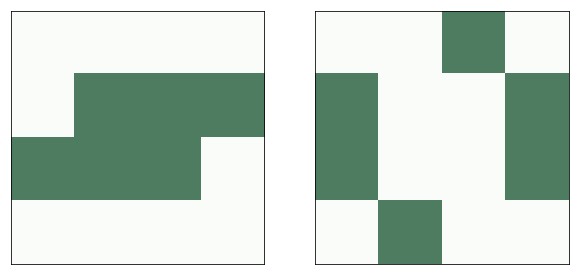

In [5]:
#A toad is an oscillator with period 2. Here's are its two configurations:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(4, 4, 1, 0, '0111', '1110')
life.draw()

plt.subplot(1, 2, 2)
life.step()
life.draw()

savefig('toad')

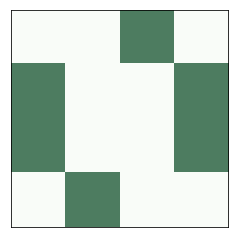

In [6]:
#Here's what the toad looks like as an animation.

life = make_life(4, 4, 1, 0, '0111', '1110')
life.animate(10, 0.5)

Saving figure to file glider


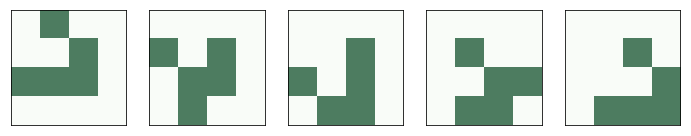

In [7]:
#A glider is a spaceship that translates one unit down and to the right with period 4.

plt.figure(figsize=(12, 4))

glider = ['010', '001', '111']
life = make_life(4, 4, 0, 0, *glider)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    life.draw()
    life.step()
    
savefig('glider')

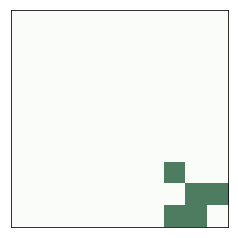

In [8]:
#glider animation
life = make_life(10, 10, 0, 0, '010', '001', '111')
life.animate(frames=28, interval=0.4)

If you start GoL from a random configuration, it usually runs chaotically for a while and then settles into stable patterns that include blinkers, blocks, and beehives, ships, boats, and loaves.

For a list of common "natually" occurring patterns, see Achim Flammenkamp, "Most seen natural occurring ash objects in Game of Life". http://wwwhomes.uni-bielefeld.de/achim/freq_top_life.html




## Methuselas

Most initial conditions run for a short time and reach a steady state. But some initial conditional run for a surprisingly long time; they are called Methuselahs).

The r-pentomino starts with only five live cells, but it runs for 1103 steps before stabilizing.


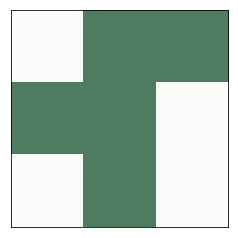

In [9]:
# r pentomino
rpent = ['011', '110', '010']
life = make_life(3, 3, 0, 0, *rpent)
life.draw()

Saving figure to file r_pent


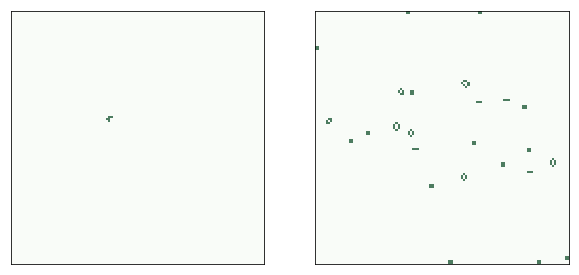

In [10]:
# here is the start and finish conditions
# r pentomino
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(120, 120, 50, 45, *rpent)
life.draw()

for i in range(1103):
    life.step()

plt.subplot(1, 2, 2)
life.draw()

savefig('r_pent')

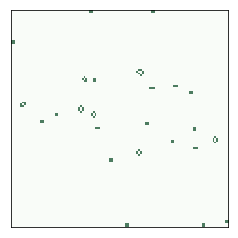

In [11]:
# here is the animation of the steps
life = make_life(120, 120, 50, 45, *rpent)
life.animate(frames=1200)


## Implementing Game of Life

As an example, we start with an array of random cells:


In [12]:
a = np.random.randint(2, size=(10, 10), dtype=np.uint8)
print(a)

[[0 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 1]
 [1 1 1 0 1 0 1 1 1 0]
 [1 1 1 1 0 0 1 0 0 1]
 [0 1 0 0 1 1 0 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 1 0 0 0 1 1]
 [1 0 0 1 0 0 1 1 1 0]
 [0 1 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 1 0 0]]


In [13]:
# here is a simple version of GoL using for loops and array slicing
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

print(b)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 1 1 1 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [14]:
#Here's a smaller, faster version using cross correlation.
from scipy.signal import correlate2d

kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==2) & a
b = b.astype(np.uint8)
print(b)

[[1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 1 0 1]
 [1 0 0 0 0 1 0 1 0 1]
 [1 1 0 0 0 1 0 0 0 1]
 [1 0 0 1 0 1 0 0 0 0]
 [0 1 1 1 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


Using a kernel that gives a weight of 10 to the center cell, we can simplify the logic a little.

In [15]:
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==12) | (c==13)
b = b.astype(np.uint8)
print(b)

[[1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 1 0 1]
 [1 0 0 0 0 1 0 1 0 1]
 [1 1 0 0 0 1 0 0 0 1]
 [1 0 0 1 0 1 0 0 0 0]
 [0 1 1 1 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


More importantly, the second version of the kernel makes it possible to use a look up table to get the next state, which is faster and even more concise.

In [16]:
table = np.zeros(20, dtype=np.uint8)

table[[3, 12, 13]] = 1
print(table)
c = correlate2d(a, kernel, mode='same')
b = table[c]
print(b)

[0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
[[1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 1 0 1]
 [1 0 0 0 0 1 0 1 0 1]
 [1 1 0 0 0 1 0 0 0 1]
 [1 0 0 1 0 1 0 0 0 0]
 [0 1 1 1 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


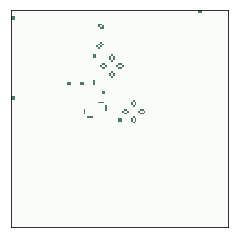

In [17]:
life = make_life(120, 120, 50, 45, *b)
life.animate(frames=1200)